In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

iris = load_iris()

In [2]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = pd.Series(iris.target)
df = df.drop(["sepal width (cm)","sepal length (cm)"],axis =1 )
df

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


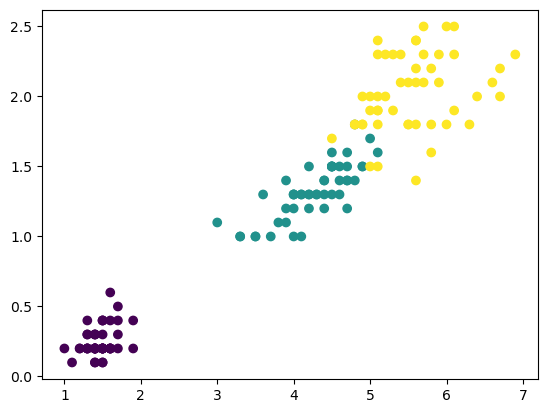

In [3]:
plt.scatter(df["petal length (cm)"], df["petal width (cm)"], label = 'target', c = df.target )

In [4]:
X = df.drop("target",axis =1 ).to_numpy()
y = df.target.to_numpy()

# cross val traditionnelle

In [5]:
X_rest, X_test, y_rest, y_test  = train_test_split(X,y, test_size=0.2, stratify = y, random_state = 42)

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(X_rest,y_rest, train_size=0.75 ,stratify = y_rest, random_state = 42)

In [7]:
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(90, 2)
(90,)
(30, 2)
(30,)
(30, 2)
(30,)


(None, None)

# hyperparametre train

In [8]:
for depth in [3, 4, 5, 6, 7,8,9,10]:
    tree = DecisionTreeClassifier(max_depth=depth,random_state=42)

    tree.fit(X_train, y_train)
    print(f'Depth: {depth}. Score: {tree.score(X_train, y_train)}. Score: {tree.score(X_valid, y_valid)}')

Depth: 3. Score: 0.9888888888888889. Score: 0.9
Depth: 4. Score: 1.0. Score: 0.9
Depth: 5. Score: 1.0. Score: 0.9
Depth: 6. Score: 1.0. Score: 0.9
Depth: 7. Score: 1.0. Score: 0.9
Depth: 8. Score: 1.0. Score: 0.9
Depth: 9. Score: 1.0. Score: 0.9
Depth: 10. Score: 1.0. Score: 0.9


# performance test 

In [9]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,roc_curve, roc_auc_score

In [10]:
arbre = DecisionTreeClassifier(max_depth=3,random_state=42).fit(X_train, y_train)

In [11]:
y_pred = arbre.predict(X_test)

In [12]:
cm2 = confusion_matrix(y_test, y_pred)
print(cm2)

[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


<Axes: >

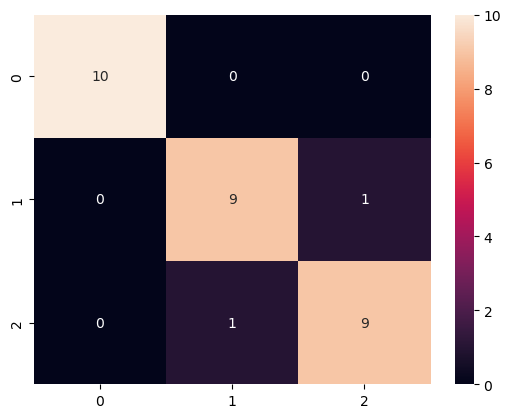

In [ ]:
sns.heatmap(cm2, annot=True)